In [ ]:
# NLP Project 1 - Statistical NLP  

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
# Import libraries 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import os
from time import time
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import csv
import re
from collections import defaultdict 
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
import spacy 
import logging 
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import string
from string import punctuation
from nltk.corpus import stopwords 
from nltk.tokenize import punkt
from nltk import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import MultiLabelBinarizer 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:
import gensim
from gensim import corpora, models, similarities, downloader
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors 
from gensim.models import Word2Vec 
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Part A
# DOMAIN: Digital content management
# PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog

In [ ]:
# Q1. Read and Analyse Dataset.

In [ ]:
# Q1 A
# Clearly write outcome of data analysis

In [ ]:
# Solution 
base_path = '/content/drive/My Drive/'
files = 'blogs.zip'
extract_path = base_path+'Data/Extracted/' 
save_extracted = base_path+'Data/Save/'

In [ ]:
from zipfile import ZipFile
blogs_zip_path = os.path.join(base_path, files)
with ZipFile(blogs_zip_path, 'r') as z:
  z.extractall(extract_path)

In [ ]:
path = '/content/drive/My Drive/blogtext.csv'

In [ ]:
blog_df = pd.read_csv(path)   

In [ ]:
blog_df.shape 

(681284, 7)

In [ ]:
# Truncating the dataset
# As the number of rows in the dataset is too large, we will truncate the dataset in order to mitigate the risks of system crash due to usage of all available RAM. 
# Using fewer data during development phase will augment execution speed too. 

In [ ]:
# Truncated dataset using the first 3000 rows 
blog_df = blog_df.head(3000) 

In [ ]:
blog_df.shape 

(3000, 7)

In [ ]:
blog_df.columns 

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [ ]:
# Checking the first 5 rows of the truncated dataset
blog_df.head() 

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
# Checking the last 5 rows of the truncated dataset
blog_df.tail()

,id,gender,age,topic,sign,date,text
2995,589736,male,35,Technology,Aries,"05,August,2004",but that zoo exhibit thing was much...
2996,589736,male,35,Technology,Aries,"05,August,2004",my fave song for the day: Aimee Man...
2997,589736,male,35,Technology,Aries,"05,August,2004",urlLink America's Best Zoo Exhibit...
2998,589736,male,35,Technology,Aries,"05,August,2004",'The less one makes declaritive sta...
2999,589736,male,35,Technology,Aries,"05,August,2004",While his status as a media persona...


In [ ]:
# Checking count of null values and data type for each feature in the truncated dataset 
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   int64 
 1   gender  3000 non-null   object
 2   age     3000 non-null   int64 
 3   topic   3000 non-null   object
 4   sign    3000 non-null   object
 5   date    3000 non-null   object
 6   text    3000 non-null   object
dtypes: int64(2), object(5)
memory usage: 164.2+ KB


In [ ]:
# Checking gender wise distribution in the truncated dataset 
blog_df.gender.value_counts()

male      2272
female     728
Name: gender, dtype: int64

Counter({'male': 2272, 'female': 728})


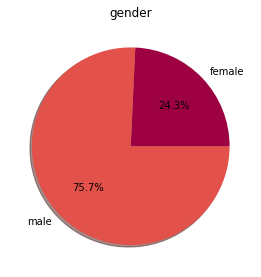

In [ ]:
from collections import Counter
from matplotlib.gridspec import GridSpec
print(Counter(blog_df['gender']))
gender_1 = blog_df.groupby('gender').agg('count')
gender_labels = gender_1.id.sort_values().index 
gender_counts = gender_1.id.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='gender')
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
# Checking unique astrological signs in the truncated dataset 
blog_df['sign'].unique()

array(['Leo', 'Aquarius', 'Aries', 'Capricorn', 'Gemini', 'Cancer',
       'Sagittarius', 'Scorpio', 'Libra', 'Virgo', 'Taurus', 'Pisces'],
      dtype=object)

In [ ]:
grouped_single = blog_df.groupby('gender').agg(Age_Mean = ('age','mean'),Age_Max=('age',max),Age_Min=('age',min))
grouped_single 

,Age_Mean,Age_Max,Age_Min
gender,,,
female,21.717033,45,14
male,31.599032,44,14


In [ ]:
grouped_single = blog_df.groupby('sign').agg(Age_Mean = ('age','mean'),Age_Max=('age',max),Age_Min=('age',min))
grouped_single

,Age_Mean,Age_Max,Age_Min
sign,,,
Aquarius,25.356643,37,15
Aries,34.051795,35,14
Cancer,23.500000,25,14
Capricorn,17.207792,25,17
Gemini,16.761905,27,15
Leo,25.600000,33,14
Libra,20.105431,41,15
Pisces,15.000000,15,15
Sagittarius,24.274336,45,17


In [ ]:
# Observation
# 1. The truncated dataset consists of 3000 rows and 7 columns 
# 2. The gender distribution in the truncated dataset is skewed towards males 
# 3. Ignoring id, only age data is of integer type, rest of the columns' data are of object type 
# 4. Each of the 12 astrological signs is represented in the truncated dataset 
# 5. The average age of males is higher than that of the females. 
# 6. The average age is minimum in the case of bloggers with Pisces sign and maximum in the case of bloggers with Virgo sign 

In [ ]:
# Q1 B
# Clean the Structured Data

In [ ]:
# Q1 B (i) 
# Missing value analysis and imputation 

In [ ]:
# Solution
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   int64 
 1   gender  3000 non-null   object
 2   age     3000 non-null   int64 
 3   topic   3000 non-null   object
 4   sign    3000 non-null   object
 5   date    3000 non-null   object
 6   text    3000 non-null   object
dtypes: int64(2), object(5)
memory usage: 164.2+ KB


In [ ]:
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
# The dataset contains no missing values. Hence, there is no need for imputation  

In [ ]:
# Q1 B (ii) 
# Eliminate Non-English textual data

In [ ]:
# Solution 
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 2.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=45b710ea61c30ee22e932a263008134cd1c68d974d96ee41051a4b19063721ad
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect
def detect_english(text):
  try:
    return detect(text) == 'en'
  except:
    return False

In [ ]:
blog_df = blog_df[blog_df['text'].apply(detect_english)]

In [ ]:
blog_df.shape  

(2816, 7)

In [ ]:
# Q2
# Preprocess unstructured data to make it consumable for model training.

In [ ]:
# Q2.A
# Eliminate all special Characters and Numbers  

In [ ]:
# Solution
# Removing all numbers 
blog_df.text = blog_df.text.apply(lambda x: re.sub("[0-9]","", x))

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- pages, an..."
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...


In [ ]:
# Select only alphabets
blog_df.text = blog_df.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found pages and MB of pdf files...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde MAAK JE E...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo s Toolbar I can now capture t...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation with my Dad...


In [ ]:
# Q2.B
# Lowercase all textual data

In [ ]:
# Solution 
# Converting text to lowercase
blog_df.text = blog_df.text.apply(lambda x: x.lower())

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found pages and mb of pdf files...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoo s toolbar i can now capture t...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",i had an interesting conversation with my dad...


In [ ]:
# Q2.C
# Remove all Stopwords

In [ ]:
# Solution
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english')) 
blog_df.text = blog_df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
blog_df.text[6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

In [ ]:
# Q2.D
# Remove all extra white spaces

In [ ]:
# Solution
blog_df.text = blog_df.text.apply(lambda x: x.strip())

In [ ]:
blog_df.text[6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

In [ ]:
# Q3
# Build a base Classification model

In [ ]:
# Q3.A
# Create dependent and independent variables

In [ ]:
blog_df.shape

(2816, 7)

In [ ]:
# As per directives, we will consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.
# Selecting only required columns from the dataframe
blog_df = blog_df[['text','topic']]

In [ ]:
blog_df.shape

(2816, 2)

In [ ]:
blog_df.head()

,text,topic
0,info found pages mb pdf files wait untill team...,Student
2,het kader van kernfusie op aarde maak je eigen...,Student
3,testing testing,Student
4,thanks yahoo toolbar capture urls popups means...,InvestmentBanking
5,interesting conversation dad morning talking k...,InvestmentBanking


In [ ]:
# Independent variable
X = blog_df.text.values
# Dependent variable 
Y = blog_df.topic.values

In [ ]:
print(X.shape, Y.shape)

(2816,) (2816,)


In [ ]:
# Q3.B
# Split data into train and test.

In [ ]:
# Solution
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7, shuffle=True)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2252,) (564,) (2252,) (564,)


In [ ]:
# Q3.C
# Vectorize data using any one vectorizer.

In [ ]:
# Solution
# Using Term Frequency-Inverse Document Frequency Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [ ]:
type(X_train_tfidf)

numpy.ndarray

In [ ]:
type(X_test_tfidf)

numpy.ndarray

In [ ]:
print(X_train_tfidf.shape, X_test_tfidf.shape)

(2252, 175155) (564, 175155)


In [ ]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Feature names 
tfidf_vectorizer.get_feature_names()[:5]

['aa', 'aa anger', 'aa compared', 'aa nice', 'aaa']

In [ ]:
blog_df.topic.values 

array(['Student', 'Student', 'Student', ..., 'Technology', 'Technology',
       'Technology'], dtype=object)

In [ ]:
blog_df.topic.unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology'], dtype=object)

In [ ]:
# Create a dictionary to get topic counts 
d = dict()
for word in blog_df.topic.values:
  if word in d:
     d[word] = d[word] + 1
  else:
    d[word] = 1
  
# Print the contents of dictionary
for key in list(d.keys()):
    print(key, ":", d[key])

Student : 386
InvestmentBanking : 70
indUnk : 437
Non-Profit : 45
Banking : 16
Education : 116
Engineering : 119
Science : 31
Communications-Media : 14
BusinessServices : 9
Sports-Recreation : 75
Arts : 2
Internet : 20
Museums-Libraries : 2
Accounting : 2
Technology : 1472


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)  

In [ ]:
type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
print(y_train.shape, y_test.shape)

(2252,) (564,)


In [ ]:
y_train 

array([13,  6, 13, ...,  5, 13, 10])

In [ ]:
y_test

array([ 5, 14, 14, 12, 14,  2, 15, 14,  5, 15, 13, 15, 14, 14, 15, 13,  6,
       14, 13, 10, 14, 14, 15, 15, 14, 13, 14, 14, 14, 15, 14, 14, 15, 14,
       14, 14, 11, 15, 13, 13, 15, 13, 13, 14, 14, 14, 13, 15, 14, 13, 14,
       15, 13, 12, 14,  5, 14, 14, 14, 15, 14,  3, 14, 14, 11, 14, 15, 13,
       14, 13, 14, 12, 14, 15,  7, 15,  6, 14, 13, 14, 13, 14, 14, 12,  6,
       14, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        6, 15, 13, 14, 14,  6, 14, 13, 14, 13, 13,  5, 15, 14, 14,  6, 14,
       15, 14,  6, 14,  6, 15, 14, 13, 12, 14,  5, 14, 14, 14, 14, 15, 14,
       14, 15, 15, 14, 15, 14, 14, 15, 14,  8, 14, 14, 14, 12, 14, 15, 14,
       13, 14, 14, 14, 13, 15, 14, 14, 14, 14, 13, 13, 14, 15, 15, 14,  5,
       14, 14, 14, 14, 14, 15, 13, 14, 14, 14, 14, 14, 14, 12, 13, 15, 14,
       14, 14, 13,  8, 14, 15, 14, 14, 14, 14, 14, 14, 14, 10,  8, 13, 14,
       13, 14,  5, 14, 14, 14,  7, 13, 14,  7,  6, 14, 12, 14, 14, 14, 14,
       15,  6, 13, 15, 14

In [ ]:
# Q3.D
# Build a base model for Supervised Learning - Classification.

In [ ]:
# Solution
# Base model = Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf_logistic = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', random_state = 7)
# class_weight = 'balanced' uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
clf_ovr = OneVsRestClassifier(clf_logistic) 

In [ ]:
# Using TF-IDF vectorizer 
# Fit the classifier 
clf_ovr.fit(X_train_tfidf, y_train) 
# Predict the response 
y_pred = clf_ovr.predict(X_test_tfidf)  

In [ ]:
clf_ovr.get_params(deep = True)

{'estimator__C': 1.0,
 'estimator__class_weight': 'balanced',
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 7,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(class_weight='balanced', random_state=7),
 'n_jobs': None}

In [ ]:
# Q3.E
# Clearly print Performance Metrics.

In [ ]:
# Solution
# Performance Metrics

In [ ]:
# Precision score 
from sklearn.metrics import precision_score
precision_Logistic_tfidf = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_Logistic_tfidf))

0.7801


In [ ]:
# Recall score 
from sklearn.metrics import recall_score
recall_Logistic_tfidf = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_Logistic_tfidf))

0.7801


In [ ]:
# F1 score
from sklearn.metrics import f1_score
f1_score_Logistic_tfidf = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_Logistic_tfidf))

0.7801


In [ ]:
# Q4
# Improve Performance of model.

In [ ]:
# Q4.A
# Experiment with other vectorisers.

In [ ]:
# Solution
# Count vectorizer
cv_vectorizer = CountVectorizer(ngram_range = (1,2))

In [ ]:
X_train_cv = cv_vectorizer.fit_transform(X_train).toarray()
X_test_cv = cv_vectorizer.transform(X_test).toarray() 

In [ ]:
print(X_train_cv.shape, X_test_cv.shape)

(2252, 175155) (564, 175155)


In [ ]:
print(y_train.shape, y_test.shape)

(2252,) (564,)


In [ ]:
# Base model = Logistic Regression
clf_logistic = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', random_state = 7)
clf_ovr = OneVsRestClassifier(clf_logistic)

In [ ]:
# Fit the classifier 
clf_ovr.fit(X_train_cv, y_train) 
# Predict the response 
y_pred = clf_ovr.predict(X_test_cv)  

In [ ]:
# Performance Metrics 
precision_Logistic_cv = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_Logistic_cv))
recall_Logistic_cv = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_Logistic_cv))
f1_score_Logistic_cv = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_Logistic_cv))

0.7606
0.7606
0.7606


In [ ]:
# Observation 
# Logistic Regression with TF-IDF vectorizer produced better model outcomes. 

In [ ]:
# Q4.B
# Build classifier Models using other algorithms than base model.

In [ ]:
# Solution
# Base Model = Logistic regression 
# Models to train
#1. K-Nearest Neighbours 
#2. Linear Support Vector Classifier
#3. Multinomial Naive Bayes
#4. XG Boost  
#5. Random Forest 
#6. Neural Network

In [ ]:
# K-Nearest Neighbours 
# Using TF-IDF vectoriser 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance') 
knn.fit(X_train_tfidf, y_train)
y_pred = knn.predict(X_test_tfidf)     

In [ ]:
# Performance Metrics 
precision_KNN_tfidf = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_KNN_tfidf))
recall_KNN_tfidf = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_KNN_tfidf))
f1_score_KNN_tfidf = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_KNN_tfidf))


0.6525
0.6525
0.6525


In [ ]:
# K-Nearest Neighbours 
# Using Count vectoriser 
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance') 
knn.fit(X_train_cv, y_train)
y_pred = knn.predict(X_test_cv)  

In [ ]:
# Performance Metrics 
precision_KNN_cv = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_KNN_cv))
recall_KNN_cv = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_KNN_cv))
f1_score_KNN_cv = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_KNN_cv))

0.5337
0.5337
0.5337


In [ ]:
# Observation 
# Modeling by K-NN algorithm with TF-IDF vectorizer led to significantly better model outcomes.     

In [ ]:
# Linear Support Vector Classifier
# Using TF-IDF vectoriser 
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsRestClassifier
clf_LinearSVC = LinearSVC (class_weight = 'balanced', random_state = 7)
# class_weight = 'balanced' uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
clf_ovr_LinearSVC = OneVsRestClassifier(clf_LinearSVC)
clf_ovr_LinearSVC.fit(X_train_tfidf, y_train)
y_pred = clf_ovr_LinearSVC.predict(X_test_tfidf) 

In [ ]:
clf_ovr_LinearSVC.get_params(deep = True)

{'estimator__C': 1.0,
 'estimator__class_weight': 'balanced',
 'estimator__dual': True,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__loss': 'squared_hinge',
 'estimator__max_iter': 1000,
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 7,
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator': LinearSVC(class_weight='balanced', random_state=7),
 'n_jobs': None}

In [ ]:
# Performance Metrics 
precision_LinearSVC_tfidf = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_LinearSVC_tfidf))
recall_LinearSVC_tfidf = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_LinearSVC_tfidf))
f1_score_LinearSVC_tfidf = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_LinearSVC_tfidf))

0.8138
0.8138
0.8138


In [ ]:
# Linear Support Vector Classifier
# Using Count vectoriser 
clf_ovr_LinearSVC.fit(X_train_cv, y_train)
y_pred = clf_ovr_LinearSVC.predict(X_test_cv) 

In [ ]:
# Performance Metrics 
precision_LinearSVC_cv = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_LinearSVC_cv))
recall_LinearSVC_cv = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_LinearSVC_cv))
f1_score_LinearSVC_cv = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_LinearSVC_cv)) 

0.6986
0.6986
0.6986


In [ ]:
# Observation
# Linear SVC with TF-IDF vectoriser produced significantly better model outcomes. 

In [ ]:
# Multinomial Naive Bayes
# Using TF-IDF vectoriser 
from sklearn.naive_bayes import MultinomialNB
clf_MNB = MultinomialNB()
clf_MNB.fit(X_train_tfidf, y_train)
y_pred = clf_MNB.predict(X_test_tfidf) 

In [ ]:
# Performance Metrics 
precision_clf_MNB_tfidf = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_clf_MNB_tfidf))
recall_clf_MNB_tfidf = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_clf_MNB_tfidf))
f1_score_clf_MNB_tfidf = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_clf_MNB_tfidf))

0.5106
0.5106
0.5106


In [ ]:
# Using Count vectoriser 
clf_MNB = MultinomialNB()
clf_MNB.fit(X_train_cv, y_train)
y_pred = clf_MNB.predict(X_test_cv) 

In [ ]:
# Performance Metrics 
precision_clf_MNB_cv = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_clf_MNB_cv))
recall_clf_MNB_cv = recall_score(y_test, y_pred, average='micro')   
print('{:.4f}'.format(recall_clf_MNB_cv))
f1_score_clf_MNB_cv = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_clf_MNB_cv))

0.6277
0.6277
0.6277


In [ ]:
# Observation
#  Multinomial Naive Bayes model with Count Vectoriser yielded superior model oucomes. 

In [ ]:
# XG Boost 
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# XG Boost 
# Using TF-IDF vectoriser 
import xgboost as xgb 
from xgboost import XGBClassifier 
xgb_model = XGBClassifier(tree_method = "hist", objective = 'multi:softprob', eval_metric = 'mlogloss', n_jobs=-1, verbose=True, random_state=7)
xgb_model.fit(X_train_tfidf, y_train)
y_pred = xgb_model.predict(X_test_tfidf)

In [ ]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 7,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'tree_method': 'hist',
 'eval_metric': 'mlogloss',
 'verbose': True}

In [ ]:
# Performance Metrics 
precision_xgb_model_tfidf = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_xgb_model_tfidf))
recall_xgb_model_tfidf = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_xgb_model_tfidf))
f1_score_xgb_model_tfidf = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_xgb_model_tfidf))

0.7323
0.7323
0.7323


In [ ]:
# XG Boost 
# Using Count vectoriser 
xgb_model = XGBClassifier(tree_method = "hist", objective= 'multi:softprob', eval_metric = 'mlogloss', n_jobs=-1, verbose=True, random_state=7)
xgb_model.fit(X_train_cv, y_train)
y_pred = xgb_model.predict(X_test_cv) 

In [ ]:
# Performance Metrics 
precision_xgb_model_cv = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_xgb_model_cv))
recall_xgb_model_cv = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_xgb_model_cv))
f1_score_xgb_model_cv = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_xgb_model_cv))

0.7110
0.7110
0.7110


In [ ]:
# Observation
# XG-Boost model with TF-IDF vectorizer produced better model outcomes. 

In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier 
# Using TF-IDF vectoriser 
random_forest = RandomForestClassifier(n_jobs = -1, class_weight='balanced', verbose=True, random_state=7)
random_forest.fit(X_train_tfidf, y_train)
y_pred = random_forest.predict(X_test_tfidf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
# Performance Metrics 
precision_random_forest_tfidf = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_random_forest_tfidf)) 
recall_random_forest_tfidf = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_random_forest_tfidf))
f1_score_random_forest_tfidf = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_random_forest_tfidf))

0.5603
0.5603
0.5603


In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier 
# Using Count vectoriser 
random_forest = RandomForestClassifier(n_jobs = -1, class_weight='balanced', verbose=True, random_state=7)
random_forest.fit(X_train_cv, y_train)
y_pred = random_forest.predict(X_test_cv)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
# Performance Metrics 
precision_random_forest_cv = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_random_forest_cv))
recall_random_forest_cv = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_random_forest_cv))
f1_score_random_forest_cv = f1_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(f1_score_random_forest_cv))

0.5621
0.5621
0.5621


In [ ]:
# Observation
# Random forest model with Count vectorizer and TF-IDF vectorizer generated identical model outcomes.  

In [ ]:
# Neural Network 
import tensorflow as tf 
from keras.layers import  Dropout, Dense
from keras.models import Sequential  
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical    

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
np.max(y_train)

15

In [ ]:
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Inputs
# Using TF-IDF vectoriser 
# number of nodes
node = 512 
# number of  hidden layers 
nLayers = 4 
# feature space of input  
shape = X_train_tfidf.shape[1]

In [ ]:
print(X_train_tfidf.shape, y_train.shape)

(2252, 175155) (2252, 16)


In [ ]:
# Model architecture
# Vectorizer = TFIDF  
# Using Precision metric 
# Precision metric computes the precision of the predictions with respect to the labels.
model = Sequential()
tf.random.set_seed(7)
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['Precision'])

In [ ]:
history_tfidf_precision = model.fit(X_train_tfidf, y_train, validation_data=(X_test_tfidf, y_test), batch_size = 8, epochs = 30, verbose = 1)

Epoch 1/30
282/282 [==============================] - 38s 131ms/step - loss: 1.3460 - precision: 0.8177 - val_loss: 0.9899 - val_precision: 0.9121
Epoch 2/30
282/282 [==============================] - 40s 141ms/step - loss: 0.4945 - precision: 0.9728 - val_loss: 0.8825 - val_precision: 0.9257
Epoch 3/30
282/282 [==============================] - 39s 138ms/step - loss: 0.1791 - precision: 0.9915 - val_loss: 1.2779 - val_precision: 0.8728
Epoch 4/30
282/282 [==============================] - 38s 134ms/step - loss: 0.0867 - precision: 0.9954 - val_loss: 1.1086 - val_precision: 0.8910
Epoch 5/30
282/282 [==============================] - 37s 130ms/step - loss: 0.0447 - precision: 0.9991 - val_loss: 1.2594 - val_precision: 0.8491
Epoch 6/30
282/282 [==============================] - 37s 130ms/step - loss: 0.0246 - precision: 0.9991 - val_loss: 1.3720 - val_precision: 0.8356
Epoch 7/30
282/282 [==============================] - 37s 130ms/step - loss: 0.0182 - precision: 0.9991 - val_loss: 1.

In [ ]:
# Performance metric
print("Evaluate on test data")
precision_NN_tfidf = model.evaluate(X_test_tfidf, y_test, batch_size=8)
print("Test Precision:", precision_NN_tfidf)

Evaluate on test data
71/71 [==============================] - 2s 27ms/step - loss: 0.8284 - precision: 0.8135
Test Precision: [0.828446626663208, 0.8135283589363098]


In [ ]:
# Model architecture
# Vectorizer = TFIDF  
# Using Recall metric 
# Recall metric computes the recall of the predictions with respect to the labels.
model = Sequential()
tf.random.set_seed(7)
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['Recall'])

In [ ]:
history_tfidf_recall = model.fit(X_train_tfidf, y_train, validation_data=(X_test_tfidf, y_test), batch_size = 8, epochs = 30, verbose = 1)

Epoch 1/30
282/282 [==============================] - 37s 130ms/step - loss: 1.3460 - recall: 0.4480 - val_loss: 0.9899 - val_recall: 0.5887
Epoch 2/30
282/282 [==============================] - 35s 124ms/step - loss: 0.4945 - recall: 0.7780 - val_loss: 0.8825 - val_recall: 0.6188
Epoch 3/30
282/282 [==============================] - 35s 124ms/step - loss: 0.1791 - recall: 0.9352 - val_loss: 1.2779 - val_recall: 0.5355
Epoch 4/30
282/282 [==============================] - 35s 124ms/step - loss: 0.0867 - recall: 0.9680 - val_loss: 1.1086 - val_recall: 0.5940
Epoch 5/30
282/282 [==============================] - 35s 124ms/step - loss: 0.0447 - recall: 0.9827 - val_loss: 1.2594 - val_recall: 0.5585
Epoch 6/30
282/282 [==============================] - 35s 123ms/step - loss: 0.0246 - recall: 0.9911 - val_loss: 1.3720 - val_recall: 0.5408
Epoch 7/30
282/282 [==============================] - 36s 129ms/step - loss: 0.0182 - recall: 0.9956 - val_loss: 1.1951 - val_recall: 0.5940
Epoch 8/30
28

In [ ]:
# Performance metric 
print("Evaluate on test data")
recall_NN_tfidf = model.evaluate(X_test_tfidf, y_test, batch_size=8)
print("Test Recall:", recall_NN_tfidf)

Evaluate on test data
71/71 [==============================] - 2s 26ms/step - loss: 0.8284 - recall: 0.7890
Test Recall: [0.828446626663208, 0.7890070676803589]


In [ ]:
# Model architecture
# Vectorizer = Count vectorizer 
# Using Precision metric 
# Precision metric computes the precision of the predictions with respect to the labels.
model = Sequential()
tf.random.set_seed(7)
model.add(Dense(512, input_shape = (X_train_cv.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape = (X_train_cv.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['Precision'])

In [ ]:
history_cv_precision = model.fit(X_train_cv, y_train, validation_data=(X_test_cv, y_test), batch_size = 8, epochs = 30, verbose = 1)

Epoch 1/30
282/282 [==============================] - 37s 129ms/step - loss: 1.2548 - precision: 0.8376 - val_loss: 0.7502 - val_precision: 0.8821
Epoch 2/30
282/282 [==============================] - 36s 129ms/step - loss: 0.3495 - precision: 0.9492 - val_loss: 0.6723 - val_precision: 0.8938
Epoch 3/30
282/282 [==============================] - 37s 131ms/step - loss: 0.1771 - precision: 0.9788 - val_loss: 0.6897 - val_precision: 0.9180
Epoch 4/30
282/282 [==============================] - 42s 149ms/step - loss: 0.1331 - precision: 0.9835 - val_loss: 0.7461 - val_precision: 0.9137
Epoch 5/30
282/282 [==============================] - 43s 154ms/step - loss: 0.2015 - precision: 0.9902 - val_loss: 0.8752 - val_precision: 0.9093
Epoch 6/30
282/282 [==============================] - 43s 151ms/step - loss: 0.1010 - precision: 0.9871 - val_loss: 0.9910 - val_precision: 0.8584
Epoch 7/30
282/282 [==============================] - 44s 155ms/step - loss: 0.0577 - precision: 0.9924 - val_loss: 1.

In [ ]:
# Performance metric
print("Evaluate on test data")
precision_NN_cv = model.evaluate(X_test_cv, y_test, batch_size=8)
print("Test Precision:", precision_NN_cv)

Evaluate on test data
71/71 [==============================] - 3s 41ms/step - loss: 1.7380 - precision: 0.7623
Test Precision: [1.738016128540039, 0.7622641324996948]


In [ ]:
# Model architecture
# Vectorizer = Count vectorizer   
# Using Recall metric 
# Recall metric computes the recall of the predictions with respect to the labels.
model = Sequential()
tf.random.set_seed(7)
model.add(Dense(512, input_shape = (X_train_cv.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape = (X_train_cv.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['Recall'])

In [ ]:
history_cv_recall = model.fit(X_train_cv, y_train, validation_data=(X_test_cv, y_test), batch_size = 8, epochs = 30, verbose = 1)

Epoch 1/30
282/282 [==============================] - 42s 145ms/step - loss: 1.2548 - recall: 0.4969 - val_loss: 0.7502 - val_recall: 0.6897
Epoch 2/30
282/282 [==============================] - 40s 143ms/step - loss: 0.3495 - recall: 0.8885 - val_loss: 0.6723 - val_recall: 0.7163
Epoch 3/30
282/282 [==============================] - 39s 138ms/step - loss: 0.1771 - recall: 0.9618 - val_loss: 0.6897 - val_recall: 0.6950
Epoch 4/30
282/282 [==============================] - 39s 139ms/step - loss: 0.1331 - recall: 0.9778 - val_loss: 0.7461 - val_recall: 0.6755
Epoch 5/30
282/282 [==============================] - 40s 143ms/step - loss: 0.2015 - recall: 0.9858 - val_loss: 0.8752 - val_recall: 0.6578
Epoch 6/30
282/282 [==============================] - 36s 129ms/step - loss: 0.1010 - recall: 0.9849 - val_loss: 0.9910 - val_recall: 0.6879
Epoch 7/30
282/282 [==============================] - 37s 130ms/step - loss: 0.0577 - recall: 0.9907 - val_loss: 1.0137 - val_recall: 0.6578
Epoch 8/30
28

In [ ]:
# Performance metric 
print("Evaluate on test data")
recall_NN_cv = model.evaluate(X_test_cv, y_test, batch_size=8)
print("Test Recall:", recall_NN_cv)

Evaluate on test data
71/71 [==============================] - 2s 28ms/step - loss: 1.7380 - recall: 0.7163
Test Recall: [1.738016128540039, 0.716312050819397]


In [ ]:
# Observation 
# Neural Network model with TF-IDF vectorizer generated superior model outcomes. 

In [ ]:
# Model outputs 
output = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbours', 
                                  'Linear Support Vector Classifier','Multinomial Naive Bayes','XG Boost','Random Forest','Neural Network'], 
                       'Precision_tfidf': [precision_Logistic_tfidf, precision_KNN_tfidf, precision_LinearSVC_tfidf, precision_clf_MNB_tfidf,
                                          precision_xgb_model_tfidf, precision_random_forest_tfidf, precision_NN_tfidf],
                       'Precision_cv': [precision_Logistic_cv, precision_KNN_cv, precision_LinearSVC_cv, precision_clf_MNB_cv, precision_xgb_model_cv,
                                        precision_random_forest_cv, precision_NN_cv],
                       'Recall_tfidf': [recall_Logistic_tfidf, recall_KNN_tfidf, recall_LinearSVC_tfidf, recall_clf_MNB_tfidf, recall_xgb_model_tfidf, 
                                        recall_random_forest_tfidf, recall_NN_tfidf],
                       'Recall_cv' : [recall_Logistic_cv, recall_KNN_cv, recall_LinearSVC_cv, recall_clf_MNB_cv, recall_xgb_model_cv, 
                                      recall_random_forest_cv, recall_NN_cv]})
output

,Model,Precision_tfidf,Precision_cv,Recall_tfidf,Recall_cv
0,Logistic Regression,0.780142,0.760638,0.780142,0.760638
1,K-Nearest Neighbours,0.652482,0.533688,0.652482,0.533688
2,Linear Support Vector Classifier,0.81383,0.698582,0.81383,0.698582
3,Multinomial Naive Bayes,0.510638,0.62766,0.510638,0.62766
4,XG Boost,0.73227,0.710993,0.73227,0.710993
5,Random Forest,0.560284,0.562057,0.560284,0.562057
6,Neural Network,"[0.828446626663208, 0.8135283589363098]","[1.738016128540039, 0.7622641324996948]","[0.828446626663208, 0.7890070676803589]","[1.738016128540039, 0.716312050819397]"


In [ ]:
# PS: In the case of NN, The 2nd numerical data within the parenthesis denotes model precision  

In [ ]:
# Q4.C
# Tune Parameters/Hyperparameters of the model/s.

In [ ]:
# Solution
# In terms of precision, the 2 best models that out-performed the other base models are 
#1. Linear SVC with TF-IDF vectorizer
#2. Neural Network with TF-IDF vectorizer
# We will do hyper-parameter tuning of the above models



In [ ]:
# Neural Network
# Hyper-parameter tuning using Randomised Search CV  

In [ ]:
# Architecture of the Neural Network model with TF-IDF vectorizer and Precision metric 
def define_model(learning_rate = 1e-4, optimizer = 'adam'):
  model = Sequential()
  tf.random.set_seed(7)
  model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
  model.add(Activation ('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
  model.add(Activation ('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  adam = tf.keras.optimizers.Adam(learning_rate = learning_rate)
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['Precision'])
  return model 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier 

In [ ]:
model_CV = KerasClassifier(build_fn= define_model, epochs=30, 
                           batch_size=8, verbose=1)

In [ ]:
# Randomised Search CV with scoring = Precision
# define the random search parameters 
param_dist = {'learning_rate': [1e-2, 1e-3, 1e-4]}
# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(estimator = model_CV, param_distributions = param_dist, n_iter = samples, refit = True, 
                              scoring = 'precision', cv = 3, random_state =7)
result = randomCV.fit(X_train_tfidf, y_train)  
# Print best parameter after tuning
print(randomCV.best_params_)
# Print how our model looks after hyper-parameter tuning
print(randomCV.best_estimator_)

Epoch 1/30
188/188 [==============================] - 23s 116ms/step - loss: 1.4875 - precision: 0.7810
Epoch 2/30
188/188 [==============================] - 22s 116ms/step - loss: 0.6405 - precision: 0.9681
Epoch 3/30
188/188 [==============================] - 22s 115ms/step - loss: 0.2669 - precision: 0.9947
Epoch 4/30
188/188 [==============================] - 22s 116ms/step - loss: 0.1200 - precision: 0.9945
Epoch 5/30
188/188 [==============================] - 22s 115ms/step - loss: 0.0677 - precision: 0.9986
Epoch 6/30
188/188 [==============================] - 22s 115ms/step - loss: 0.0408 - precision: 0.9993
Epoch 7/30
188/188 [==============================] - 22s 115ms/step - loss: 0.0260 - precision: 0.9993
Epoch 8/30
188/188 [==============================] - 22s 116ms/step - loss: 0.0163 - precision: 0.9987
Epoch 9/30
188/188 [==============================] - 22s 116ms/step - loss: 0.0091 - precision: 1.0000
Epoch 10/30
188/188 [==============================] - 22s 115ms

In [ ]:
# Refitting the NN model with the best hyper-parameters 
# Learning rate = 0.01

In [ ]:
# With TF-IDF vectoriser and Precision metric  
## Using the best hyper-parameters from Randomised search CV 
model = Sequential()
tf.random.set_seed(7)
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['Precision'])


In [ ]:
history_tfidf_precision = model.fit(X_train_tfidf, y_train, validation_data=(X_test_tfidf, y_test), batch_size = 8, epochs = 30, verbose = 1)

Epoch 1/30
282/282 [==============================] - 36s 127ms/step - loss: 1.3460 - precision: 0.8177 - val_loss: 0.9899 - val_precision: 0.9121
Epoch 2/30
282/282 [==============================] - 32s 115ms/step - loss: 0.4945 - precision: 0.9728 - val_loss: 0.8825 - val_precision: 0.9257
Epoch 3/30
282/282 [==============================] - 32s 115ms/step - loss: 0.1791 - precision: 0.9915 - val_loss: 1.2779 - val_precision: 0.8728
Epoch 4/30
282/282 [==============================] - 32s 115ms/step - loss: 0.0867 - precision: 0.9954 - val_loss: 1.1086 - val_precision: 0.8910
Epoch 5/30
282/282 [==============================] - 32s 114ms/step - loss: 0.0447 - precision: 0.9991 - val_loss: 1.2594 - val_precision: 0.8491
Epoch 6/30
282/282 [==============================] - 32s 114ms/step - loss: 0.0246 - precision: 0.9991 - val_loss: 1.3720 - val_precision: 0.8356
Epoch 7/30
282/282 [==============================] - 33s 116ms/step - loss: 0.0182 - precision: 0.9991 - val_loss: 1.

In [ ]:
# Performance metric
print("Evaluate on test data")
precision_NN_tuned_tfidf = model.evaluate(X_test_tfidf, y_test, batch_size=8)
print("Test Precision:", precision_NN_tuned_tfidf)  

Evaluate on test data
71/71 [==============================] - 2s 29ms/step - loss: 0.8284 - precision: 0.8135
Test Precision: [0.828446626663208, 0.8135283589363098]


In [ ]:
# With TF-IDF vectoriser and Recall metric  
## Using the best hyper-parameters from Randomised search CV 
model = Sequential()
tf.random.set_seed(7)
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, input_shape = (X_train_tfidf.shape[1],))) 
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
adam = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['Recall'])

In [ ]:
history_tfidf_recall = model.fit(X_train_tfidf, y_train, validation_data = (X_test_tfidf, y_test), batch_size = 8, epochs = 30, verbose = 1)

Epoch 1/30
282/282 [==============================] - 41s 141ms/step - loss: 1.3460 - recall: 0.4480 - val_loss: 0.9899 - val_recall: 0.5887
Epoch 2/30
282/282 [==============================] - 39s 138ms/step - loss: 0.4945 - recall: 0.7780 - val_loss: 0.8825 - val_recall: 0.6188
Epoch 3/30
282/282 [==============================] - 39s 138ms/step - loss: 0.1791 - recall: 0.9352 - val_loss: 1.2779 - val_recall: 0.5355
Epoch 4/30
282/282 [==============================] - 39s 137ms/step - loss: 0.0867 - recall: 0.9680 - val_loss: 1.1086 - val_recall: 0.5940
Epoch 5/30
282/282 [==============================] - 39s 139ms/step - loss: 0.0447 - recall: 0.9827 - val_loss: 1.2594 - val_recall: 0.5585
Epoch 6/30
282/282 [==============================] - 39s 138ms/step - loss: 0.0246 - recall: 0.9911 - val_loss: 1.3720 - val_recall: 0.5408
Epoch 7/30
282/282 [==============================] - 39s 138ms/step - loss: 0.0182 - recall: 0.9956 - val_loss: 1.1951 - val_recall: 0.5940
Epoch 8/30
28

In [ ]:
# Performance metric
print("Evaluate on test data")
recall_NN_tuned_tfidf = model.evaluate(X_test_tfidf, y_test, batch_size = 8)
print("Test Recall", recall_NN_tuned_tfidf) 

Evaluate on test data
71/71 [==============================] - 2s 30ms/step - loss: 0.8284 - recall: 0.7890
Test Recall [0.828446626663208, 0.7890070676803589]


In [ ]:
# Linear SVC
# # Hyper-parameter tuning using Randomised Search CV   

In [ ]:
# Base model
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsRestClassifier
clf_LinearSVC = LinearSVC (class_weight = 'balanced', random_state = 7)
# class_weight = 'balanced' uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
clf_ovr_LinearSVC = OneVsRestClassifier(clf_LinearSVC)
clf_ovr_LinearSVC.fit(X_train_tfidf, y_train)
y_pred = clf_ovr_LinearSVC.predict(X_test_tfidf) 

In [ ]:
clf_ovr_LinearSVC.get_params (deep = True)

{'estimator__C': 1.0,
 'estimator__class_weight': 'balanced',
 'estimator__dual': True,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__loss': 'squared_hinge',
 'estimator__max_iter': 1000,
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 7,
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator': LinearSVC(class_weight='balanced', random_state=7),
 'n_jobs': None}

In [ ]:
# Randomised Search CV with scoring = Precision
# define the random search parameters 
param_dist = {'estimator__C': [0.1, 0.5, 1, 1.5, 2]}
# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(estimator = clf_ovr_LinearSVC, param_distributions = param_dist, n_iter = samples, refit = True, 
                              scoring = 'precision', cv = 3, random_state = 7, verbose = 1)
result = randomCV.fit(X_train_tfidf, y_train)  
# Print best parameter after tuning
print(randomCV.best_params_)
# Print how our model looks after hyper-parameter tuning
print(randomCV.best_estimator_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'estimator__C': 0.1}
OneVsRestClassifier(estimator=LinearSVC(C=0.1, class_weight='balanced',
                                        random_state=7))


In [ ]:
# Best parameters 
C = 0.1  

In [ ]:
# Refitting the model with the best hyper-parameters 
clf_LinearSVC = LinearSVC (class_weight = 'balanced', C = 0.1, random_state = 7)
clf_ovr_LinearSVC = OneVsRestClassifier(clf_LinearSVC)
clf_ovr_LinearSVC.fit(X_train_tfidf, y_train)
y_pred = clf_ovr_LinearSVC.predict(X_test_tfidf)

In [ ]:
precision_LinearSVC_tuned_tfidf = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_LinearSVC_tuned_tfidf))
recall_LinearSVC_tuned_tfidf = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_LinearSVC_tuned_tfidf))

0.7222
0.7145


In [ ]:
# The precision and accuracy deteriorated post hyper-parameter tuning. Probably we need to increase the K in K-fold cross validation. However, increasing the K leads to repeated system crash
# as RAM exhauted. 
# Hence, we will use hyper-parameeter, C = 1

In [ ]:
# Refitting the model with hyper-parameter, C = 1
clf_LinearSVC = LinearSVC (class_weight = 'balanced', C = 1, random_state = 7)
clf_ovr_LinearSVC = OneVsRestClassifier(clf_LinearSVC)
clf_ovr_LinearSVC.fit(X_train_tfidf, y_train)
y_pred = clf_ovr_LinearSVC.predict(X_test_tfidf)

In [ ]:
precision_LinearSVC_tuned_tfidf_New = precision_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(precision_LinearSVC_tuned_tfidf_New))
recall_LinearSVC_tuned_tfidf_New = recall_score(y_test, y_pred, average='micro')
print('{:.4f}'.format(recall_LinearSVC_tuned_tfidf_New))

0.8836
0.6596


In [ ]:
# Q4.D
# Clearly print Performance Metrics.

In [ ]:
# Solution
# Peformance of the base models 
Performance_Metrics = output 
Performance_Metrics

,Model,Precision_tfidf,Precision_cv,Recall_tfidf,Recall_cv
0,Logistic Regression,0.780142,0.760638,0.780142,0.760638
1,K-Nearest Neighbours,0.652482,0.533688,0.652482,0.533688
2,Linear Support Vector Classifier,0.81383,0.698582,0.81383,0.698582
3,Multinomial Naive Bayes,0.510638,0.62766,0.510638,0.62766
4,XG Boost,0.73227,0.710993,0.73227,0.710993
5,Random Forest,0.560284,0.562057,0.560284,0.562057
6,Neural Network,"[0.828446626663208, 0.8135283589363098]","[1.738016128540039, 0.7622641324996948]","[0.828446626663208, 0.7890070676803589]","[1.738016128540039, 0.716312050819397]"


In [ ]:
# In terms of precision, 2 best base models are 
# Neural Network with TF-IDF vectorizer 
# Linear SVC with TF-IDF vectorizer

In [ ]:
# Performanace of the 2 best base models post hyper-parameter tuning 

In [ ]:
tuned_result = pd.DataFrame({'Model': ['Linear Support Vector Classifier','Neural Network'], 
                       'Precision_tfidf': [precision_LinearSVC_tuned_tfidf_New, precision_NN_tuned_tfidf],
                       'Recall_tfidf': [recall_LinearSVC_tuned_tfidf_New, recall_NN_tuned_tfidf]})
tuned_result

,Model,Precision_tfidf,Recall_tfidf
0,Linear Support Vector Classifier,0.88361,0.659574
1,Neural Network,"[0.828446626663208, 0.8135283589363098]","[0.828446626663208, 0.7890070676803589]"


In [ ]:
# # PS: In the case of NN, The 2nd numerical data within the parenthesis denotes model precision 

In [ ]:
# Between the 2 models, Linear SVC with TF-IDF vectorizer produced superior precision than NN
# However, in terms of recall, NN model with TF-IDF vectorizer outstripped the Linear SVC model 

In [ ]:
# Q5
# Share insights on relative performance comparison

In [ ]:
# Q5.A
# Which vectorizer performed better? Probable reason?.

In [ ]:
# Solution 
# Term Frequency - Inverse Document Frequency (TF-IDF) vectorizer produced better model outcomes relative to Count vectorizer 
# For both NN and Linear SVC models, the TF-IDF vectorizer produced superior outcomes 

# Reasons 
# Count-vectorizer performs tokenisation and counting of words while TF-IDF vectorizer normalizes the data as well 
# While Count vectorizer is focused solely on the frequency of words, the TF-IDF vectorizer considers the importance of words too
# The Inverse Document Frequency (IDF) part of the TF-IDF vectorizer essentially de-emphasises the most commonly occurring words and emphasises the not so commonly occurring words
# IDF (Inverse document frequency) penalizes terms that occur often in all documents
# Thus, the IDF for stop words like 'is', 'the' etc is 0. If IDF is 0 then the TF-IDF will be 0 
# Removing the stop words reduces the dimensions of the vocabulary
# Dimensionality reduction is a prudent approach to reduce model complexity and generate superior model outcomes 

In [ ]:
# Q5.B
# Which model outperformed? Probable reason?

In [ ]:
# Solution
# Base scenario
# 1. In terms of Precision, the NN with TF-IDF vectorizer and Linear SVC model with TF-IDF vectorizer produced identical model outcomes 
# 2. In terms of Recall, the best performing model is Linear SVC with TF-IDF vectorizer

# Post hyper-parameter tuning 
# 1. In terms of Precision, the best model outcome is produced by Linear SVC with TF-IDF vectorizer  
# 2. In terms of Recall, the best performing model is Neural Network with TF-IDF vectorizer

# Why Linear SVC? 
# Linear SVC is one of the best ML methods to classify text. The algorithm draws a hyper-plane that divides a space into multiple sub-spaces
# 1. The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification
# Text is mostly linearly separable. Linear kernel works well with linearly separable spaces
# 2. Linear SVC performs well with a large number of samples. In text classification, the number of features (words) and instances (documents) are large. Empirical research lends credence to the fact that
# projecting the data to a high dimensional space doesn't help when the data space is linearly separable. 
# Hence projecting data to higher dimensional spaces using kernels like RBF (Radial Basis Function) doesn't improve model performance. Linear kernel is apt for the same 
# 3. With Linear SVC, we need to regularise hyper-parameter 'C' only whereas with other SVCs we need to regularise the gamma, 'γ' hyper-parameter too. This ensures faster execution especially during 
# hyper-parameter tuning using Grid Search CV or Randomised Search CV

# Why Neural Network? 
# 1. Like Linear SVC, NN is one of the best algorithms to classify text. It is a hierarchical ML process that employs different algorithms in a progressive chain of events
# 2. ML algorithms like logistic regression etc uses a threshold for learning from training data. For example, in order to classify whether an email is spam or not spam, a classification 
# threshold must be defined. NNs, on the contrary, don’t need a threshold for learning from training data
# 3. Neural networks are a high-variance low-bias method. They perform well on large training datasets. With more training data, the model learns to generalize better. This leads to lower variance. 
# In this case, the presence of a large dataset helps the NN model to generalise better and generate superior model outcomes 

In [ ]:
# Q5.C
# Which parameter/hyperparameter significantly helped to improve performance?Probable reason?.

In [ ]:
# Solution
# In the case of Linear SVC, the C hyper-parameter improved the model performance. C is regularization parameter. The strength of the regularization is inversely proportional to C
# C parameter adds a penalty for each misclassified data point. Low C means low penalty for mis-classification. For small C, the optimizer choses a larger margin hyperplane 

# In the case of NN, tuning the learning rate hyper-parameter helped improve the model performance
# Here, we used Adam optimiser which is an extension of stochastic gradient descent optimiser 
# Stochastic gradient descent is an optimization algorithm that estimates the error gradient of the model using the training dataset, then updates the weights of the model using back-propagation
# The learning rate is a hyper-parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function
# The learning rate hyperparameter controls the rate or speed at which the model learns
# A large learning rate allows the model to learn faster at the cost of arriving at sub-optimal weights. On the contrary, a small learning rate may led to locally or even globally optimum weights 
# at the cost of higher computation time
# Adam optimiser uses adaptive learning rates. Here the algorithm monitors the model performance and adapts the learning rates accordingly 
# Here, we input the Initial step size (learning rate) and the algorithm adaptively changes the learning rates basis model outcomes 

In [ ]:
# Q5.D
# According to you, which performance metric should be given most importance, why?.

In [ ]:
# Solution
# We have used 2 model evaluation metrics viz, Precision and Recall
# The current dataset is characterised by skewed class distributions hence, accuracy metric was not used

# Precision quantifies the number of positive class predictions that actually belong to the positive class
# Recall quantifies the number of positive class predictions made out of all positive examples in the dataset
# Whether Precision is more important than Precision or vice versa depends entirely on the problem at hand
# In this case where the task is to build an NLP classifier which uses the input text parameters to determine the label/s of the blog
# Here, we felt that Precision metric holds more imprtance tha Recall
# Precision holds more significance than recall when we would like to have less False Positives in trade off to have more False Negatives
# In this case, getting a False Positive looks costly while a False Negative is not as much costly
# Hence, Precision metric outweighed Recall metric in terms of relevance 

In [ ]:
# Part B
# DOMAIN: Customer support
# PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:

In [ ]:
# Import necessary libraries
import io
import random
import string # to process standard python strings
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install nltk
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) # for downloading packages
#nltk.download('punkt') 
#nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


True

In [ ]:
# Reading the corpus file 
path = '/content/drive/My Drive/GL_Bot.json'
import json
f = open(path)
f = open(path,'r',errors = 'ignore')
raw = f.read()

In [ ]:
# Corpus file
print (raw)

{"intents": [
        {"tag": "Intro",
         "patterns": ["hi", 
                      "how are you", 
                      "is anyone there", 
                      "hello", 
                      "whats up",
                      "hey",
                      "yo",
                      "listen", 
                      "please help me",
                      "i am learner from",
                      "i belong to",
                      "aiml batch",
                      "aifl batch",
                      "i am from",
                      "my pm is",
                      "blended",
                      "online",
                      "i am from",
                      "hey ya",
                      "talking to you for first time"],
         "responses": ["Hello! how can i help you ?"],
         "context_set": ""
        },
        {"tag": "Exit",
         "patterns": ["thank you", 
                      "thanks", 
                      "cya",
                      "see you",

In [ ]:
# Pre-processing
# Converting to lowercase
raw = raw.lower() 

In [ ]:
# Tokenisation
sent_tokens = nltk.sent_tokenize(raw) # sentence tokenisation
word_tokens = nltk.word_tokenize(raw) # word tokenisation 

In [ ]:
# Lemmatization
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
# Q1. Start chat session with greetings and ask what the user is looking for.

In [ ]:
greeting_inputs = ("hello", "hi", "greetings", "sup", "what's up","hey", "good morning", "good evening", "morning", "evening", "whatsup") 
greeting_responses = ["hi, how can I help you today?", "hey, how can I help you today?", "hey, how can I help you today?", "hi there, how can I help you today?", 
                      "hello, how can I help you today?", "hey, how can I help you today?", "hey, how can I help you today?", "hi, how can I help you today?", 
                      "hey, how can I help you today?", "hey, how can I help you today?", "hello, how can I help you today?"]
    
def generate_greeting_response(greeting):
    for word in greeting.split():
        if word.lower() in greeting_inputs:
            return random.choice(greeting_responses)


In [ ]:
# Q2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.

In [ ]:
# Solution
# To generate a response from the chat bot for input questions, the concept of document similarity is used
# A function is defined which searches the user’s input for one or more known keywords and returns one of several possible responses
# If the chatbot doesn’t find the input matching any of the keywords, it returns a response:"I am sorry! I don’t understand you" 

In [ ]:
# Importing the necessary libraries 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Function for generating user's response  
def response(user_input): 
  GLrobo_response = ''
  sent_tokens.append(user_input)
  
  TfidfVec = TfidfVectorizer (tokenizer = LemNormalize, stop_words='english')
  tfidf = TfidfVec.fit_transform (sent_tokens)
  vals = cosine_similarity (tfidf[-1], tfidf)
  idx = vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if(req_tfidf == 0):
    GLrobo_response = GLrobo_response + "I am sorry! I don't understand you"
    return GLrobo_response
  else:
    GLrobo_response = GLrobo_response + sent_tokens[idx]
    return GLrobo_response 

In [ ]:
# Test 1
user_input = "Hi"


In [ ]:
response(user_input)

'{"intents": [\n        {"tag": "intro",\n         "patterns": ["hi", \n                      "how are you", \n                      "is anyone there", \n                      "hello", \n                      "whats up",\n                      "hey",\n                      "yo",\n                      "listen", \n                      "please help me",\n                      "i am learner from",\n                      "i belong to",\n                      "aiml batch",\n                      "aifl batch",\n                      "i am from",\n                      "my pm is",\n                      "blended",\n                      "online",\n                      "i am from",\n                      "hey ya",\n                      "talking to you for first time"],\n         "responses": ["hello!'

In [ ]:
# Test 2
user_input = "thank you"

In [ ]:
response(user_input)

'"],\n         "context_set": ""\n        },\n        {"tag": "exit",\n         "patterns": ["thank you", \n                      "thanks", \n                      "cya",\n                      "see you",\n                      "later", \n                      "see you later", \n                      "goodbye", \n                      "i am leaving", \n                      "have a good day",\n                      "you helped me",\n                      "thanks a lot",\n                      "thanks a ton",\n                      "you are the best",\n                      "great help",\n                      "too good",\n                      "you are a good learning buddy"],\n         "responses": ["i hope i was able to assist you, good bye"],\n         "context_set": ""\n        },\n        {"tag": "olympus",\n         "patterns": ["olympus",\n                      "explain me how olympus works",\n                      "i am not able to understand olympus",\n                      "o

In [ ]:
# Q3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

In [ ]:
# Solution
# Defining conversation start/end protocols
flag = True
print("GLBOT: My name is GLBot. How can I help you today? Also, if you want to exit any time, just type Bye!")
while (flag == True): 
    user_input = input()
    user_input = user_input.lower()
    if(user_input!='bye'):
        if(user_input == 'thanks' or user_input == 'thank you' or user_input == 'thank you very much' ):
            flag = False
            print("GLBOT: You are welcome")
        else:
            if(generate_greeting_response(user_input)!= None):
                print("GLBOT: "+ generate_greeting_response (user_input))
            else:
                sent_tokens.append (user_input)
                word_tokens = word_tokens + nltk.word_tokenize(user_input)
                final_words = list(set(word_tokens))
                print("GLBOT: ", end = "")
                print(response(user_input))
                sent_tokens.remove(user_input)
    else:
        flag = False
        print("GLBOT: Goodbye! Take care...")


GLBOT: My name is GLBot. How can I help you today? Also, if you want to exit any time, just type Bye!
Hi
GLBOT: hey, how can I help you today?
Bye
GLBOT: Goodbye! Take care...
